In [1]:
#https://analyticsindiamag.com/hands-on-guide-to-atspy-for-automating-the-time-series-forecasting/
!pip install atspy


     |████████████████████████████████| 2.1MB 4.0MB/s 
     |████████████████████████████████| 61kB 6.1MB/s 
     |████████████████████████████████| 51kB 4.8MB/s 
     |████████████████████████████████| 327kB 21.5MB/s 
     |████████████████████████████████| 81kB 7.4MB/s 
     |████████████████████████████████| 337kB 22.2MB/s 
     |████████████████████████████████| 13.1MB 304kB/s 
     |████████████████████████████████| 488.3MB 17kB/s 
     |████████████████████████████████| 3.7MB 37.8MB/s 
     |████████████████████████████████| 10.4MB 38.0MB/s 
     |████████████████████████████████| 40kB 4.5MB/s 
     |████████████████████████████████| 1.5MB 41.8MB/s 
     |████████████████████████████████| 7.1MB 42.9MB/s 
     |████████████████████████████████| 225kB 41.9MB/s 
     |████████████████████████████████| 51kB 6.0MB/s 
     |████████████████████████████████| 412.3MB 41kB/s 
     |████████████████████████████████| 102kB 7.8MB/s 
     |████████████████████████████████| 753.4MB 20kB/s 
   

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/firmai/random-assets-two/master/ts/monthly-beer-australia.csv")
df.Month = pd.to_datetime(df.Month)
df = df.set_index("Month")
df.head()

,Megaliters
Month,
1956-01-01,93.2
1956-02-01,96.0
1956-03-01,95.2
1956-04-01,77.1
1956-05-01,70.9


In [4]:
from atspy import AutomatedModel

INFO:root:Using CPU



1. ARIMA - Automated ARIMA Modelling
1. Prophet - Modeling Multiple Seasonality With Linear or Non-linear Growth
1. HWAAS - Exponential Smoothing With Additive Trend and Additive Seasonality
1. HWAMS - Exponential Smoothing with Additive Trend and Multiplicative Seasonality
1. PYAF - Feature Generating Model (slow and underforms)
1. NBEATS -  Neural basis expansion analysis (now fixed at 20 Epochs)
1. Gluonts - RNN-based Model (now fixed at 20 Epochs)
1. TATS - Seasonal and Trend no Box Cox
1. TBAT - Trend and Box Cox
1. TBATS1 - Trend, Seasonal (one), and Box Cox
1. TBATP1 - TBATS1 but Seasonal Inference is Hardcoded by Periodicity
1. TBATS2 - TBATS1 With Two Seasonal Periods

https://github.com/firmai/atspy/blob/master/atspy_files/AtsPy_Feb_2020.ipynb

In [6]:
model_list=["ARIMA", "HWAMS","HWAAS","TBAT"]

In [7]:
am = AutomatedModel(df = df , model_list=model_list, season="infer_from_data",forecast_len=60 )
forecast_in, performance = am.forecast_insample()
forecast_out = am.forecast_outsample()
all_ensemble_in, all_ensemble_out, all_performance = am.ensemble(forecast_in, forecast_out)

<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
357
An insample split of training size 357 and testing size 119 has been constructed
Model ARIMA is being trained for in sample prediction
Model HWAMS is being trained for in sample prediction
Model HWAAS is being trained for in sample prediction
Model TBAT is being trained for in sample prediction
Model ARIMA is being used to forcast in sample
Model HWAMS is being used to forcast in sample
Model HWAAS is being used to forcast in sample
Model TBAT is being used to forcast in sample
Successfully finished in sample forecast
<class 'pandas.core.frame.DataFrame'>
The data has been successfully parsed by infering a frequency, and establishing a 'Date' index and 'Target' column.
Model ARIMA is being trained for out of sample prediction
Model HWAMS is being trained for out of sample prediction
Model HWAAS is being trained for out of sample p

INFO:numexpr.utils:NumExpr defaulting to 2 threads.


390  variables are found to be almost constant
LightGBM ensemble have been successfully built
Building Standard First Level Ensemble
Building Final Multi-level Ensemble


In [8]:
forecast_in.head()

,Target,ARIMA,HWAMS,HWAAS,TBAT
Date,,,,,
1985-10-01,181.6,167.613026,161.962148,162.391653,148.410071
1985-11-01,182.0,171.457109,174.688055,173.191756,147.999237
1985-12-01,190.0,193.393543,189.728744,187.649575,147.589541
1986-01-01,161.2,160.233186,155.077205,154.817215,147.180980
1986-02-01,155.5,144.353390,148.054292,147.477692,146.773549


In [9]:

forecast_out.head()

,ARIMA,HWAMS,HWAAS,TBAT
Date,,,,
1995-09-01,131.212115,137.518755,137.133938,142.906275
1995-10-01,162.521890,164.136220,165.079612,142.865575
1995-11-01,184.214121,178.671684,180.009560,142.827110
1995-12-01,180.196305,184.175954,185.715043,142.790757
1996-01-01,149.062585,147.166448,147.440026,142.756399


In [10]:
performance

,Target,ARIMA,HWAMS,HWAAS,TBAT
rmse,0.000000,13.098059,17.599400,18.993827,36.538009
mse,0.000000,171.559145,309.738878,360.765452,1335.026136
mean,155.293277,148.256628,142.399639,140.577496,126.590412


In [11]:
all_performance

,rmse,mse,mean
ARIMA__X__ARIMA_HWAMS__X__ensemble_lgb__X__ensemble_ts__X__ARIMA_HWAMS_HWAAS,8.811177,77.636843,148.046434
ARIMA__X__ARIMA_HWAMS__X__ensemble_lgb,8.815072,77.705489,147.746169
ARIMA__X__ARIMA_HWAMS__X__ensemble_lgb__X__ensemble_ts__X__ARIMA_HWAMS_HWAAS__X__HWAMS__X__HWAAS,10.040673,100.815118,144.474396
ARIMA,10.381734,107.780399,144.484899
ARIMA__X__ARIMA_HWAMS,11.387933,129.685008,142.601578
ARIMA_HWAMS,12.626022,159.416421,140.718257
ensemble_lgb,13.006581,169.171151,158.035352
ensemble_ts,13.809845,190.711817,158.469164
ARIMA_HWAMS_HWAAS,14.198530,201.598242,138.524499
HWAMS,15.567905,242.359663,136.951615


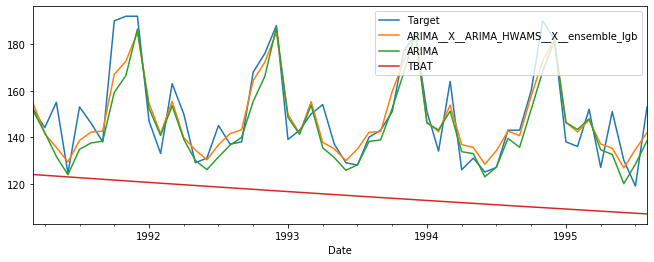

In [14]:
all_ensemble_in[["Target","ARIMA__X__ARIMA_HWAMS__X__ensemble_lgb","ARIMA","TBAT"]].plot()

In [15]:
am.models_dict_in

{'ARIMA': ARIMA(maxiter=50, method='lbfgs', order=(2, 1, 3), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(1, 0, 1, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fbf96c97e10>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fbf96c97978>,
 'TBAT': <tbats.tbats.Model.Model at 0x7fbf968bfeb8>}

In [16]:
am.models_dict_out

{'ARIMA': ARIMA(maxiter=50, method='lbfgs', order=(3, 1, 4), out_of_sample_size=0,
       scoring='mse', scoring_args=None, seasonal_order=(2, 0, 2, 12),
       start_params=None, suppress_warnings=False, trend=None,
       with_intercept=True),
 'HWAAS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fbf969620f0>,
 'HWAMS': <statsmodels.tsa.holtwinters.HoltWintersResultsWrapper at 0x7fbf969afc18>,
 'TBAT': <tbats.tbats.Model.Model at 0x7fbf969628d0>}